In [38]:
import numpy as np
import pandas as pd

import datetime

**Feature Engineering**
> Feature Engineering is the process of transforming data to increase the predictive performance of machine learning models.

In [39]:
data = {
    'col1': [1, 2, 3, 4, 5],
    'col2': [8, 7, 3, 6, 4],
    'col3': [12000, 23000, 45000, 34000, 32000]
}

In [40]:
df = pd.DataFrame(data)

In [41]:

df

,col1,col2,col3
0,1,8,12000
1,2,7,23000
2,3,3,45000
3,4,6,34000
4,5,4,32000


<Axes: >

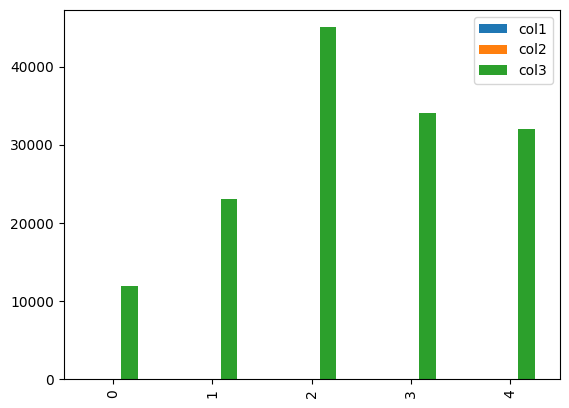

In [42]:
import matplotlib.pyplot as plt
df.plot(kind = 'bar')

# When plotting the graph, we can see that,
# col3 has dominated the graph and we cannot observe the others.


In [43]:
# So we can scale all column data in smaller ranges

for column in df.columns:
  df[column] = df[column] / df[column].abs().max()

  print(df)

   col1  col2   col3
0   0.2     8  12000
1   0.4     7  23000
2   0.6     3  45000
3   0.8     6  34000
4   1.0     4  32000
   col1   col2   col3
0   0.2  1.000  12000
1   0.4  0.875  23000
2   0.6  0.375  45000
3   0.8  0.750  34000
4   1.0  0.500  32000
   col1   col2      col3
0   0.2  1.000  0.266667
1   0.4  0.875  0.511111
2   0.6  0.375  1.000000
3   0.8  0.750  0.755556
4   1.0  0.500  0.711111


<Axes: >

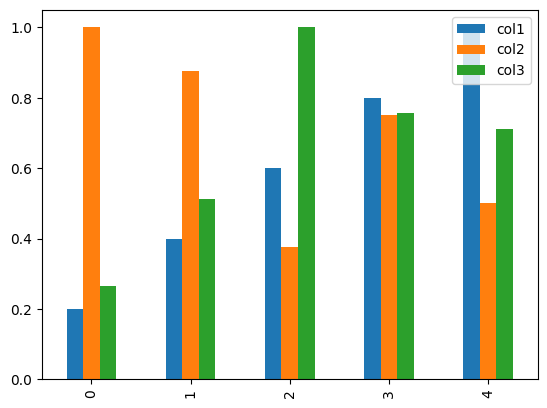

In [44]:
import matplotlib.pyplot as plt
df.plot(kind = 'bar')

#Now we can observe features from the plot.


**Scaling**
> In cases where all the columns have a significant difference in their scales, are needed to be modified in such a way that all those values fall into the same scale. This process is called Scaling.

> There are two most common techniques of how to scale columns of Pandas DataFrame-

1.   Min-Max Normalization
2.   Standardization








In [45]:
df = pd.read_csv('/content/IRIS.csv')

In [46]:
print(df)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [47]:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


Min-Max Normalization

In [48]:
#The formula for min-max normalization is -

  # x_norm = (x - x_min) / (x_max - x_min)

In [49]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [50]:
new_df = df.drop('species', axis = 1)

# Now, perform scaling on each value of each column
df_norm = ((new_df-new_df.min()) / (new_df.max()-new_df.min()))

# Now, merge the normalized df with the dropped species col
final_df = pd.concat((df_norm, df.species), axis=1)

print(final_df)

     sepal_length  sepal_width  petal_length  petal_width         species
0        0.222222     0.625000      0.067797     0.041667     Iris-setosa
1        0.166667     0.416667      0.067797     0.041667     Iris-setosa
2        0.111111     0.500000      0.050847     0.041667     Iris-setosa
3        0.083333     0.458333      0.084746     0.041667     Iris-setosa
4        0.194444     0.666667      0.067797     0.041667     Iris-setosa
..            ...          ...           ...          ...             ...
145      0.666667     0.416667      0.711864     0.916667  Iris-virginica
146      0.555556     0.208333      0.677966     0.750000  Iris-virginica
147      0.611111     0.416667      0.711864     0.791667  Iris-virginica
148      0.527778     0.583333      0.745763     0.916667  Iris-virginica
149      0.444444     0.416667      0.694915     0.708333  Iris-virginica

[150 rows x 5 columns]


In [51]:
#Using min-max from sklearn

from sklearn.preprocessing import MinMaxScaler
import pandas as pd

#Drop species col having str data
new_df = df.drop('species', axis = 1)

scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(new_df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
  'sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

print("Scaled Dataset Using MinMaxScaler")
df_scaled.head()


Scaled Dataset Using MinMaxScaler


,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


Standardization



1.   Standardization doesnot have fixed minimum or maximum value.
2.   Here, the values of all the columns are scaled in such a way that they all have a mean equal to 0 and standard deviation equal to 1.
3.   This scaling technique works well with outliers.
4.   Thus, this technique preferred if outliers are present in the dataset.



In [52]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [53]:
# Drop species col, having str data
new_df = df.drop('species', axis=1)

std_scaler = StandardScaler()

df_scaled = std_scaler.fit_transform(new_df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
'sepal_length','sepal_width','petal_length','petal_width'])

print("Scaled Dataset Using StandardScaler")
df_scaled.head()


Scaled Dataset Using StandardScaler


,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


 **Time Series Analysis and Resampling**
 > Pandas provide a different set of tools using which we can perform all the necessary tasks on date-time data.

In [54]:
# Create a dates dataframe

#Create dates dataframe with frequency

data = pd.date_range('1/1/2011', periods = 15, freq ='M')
data

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31', '2011-06-30', '2011-07-31', '2011-08-31',
               '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-31',
               '2012-01-31', '2012-02-29', '2012-03-31'],
              dtype='datetime64[ns]', freq='M')

In [55]:
# Current date and time

stamp = pd.Timestamp(datetime.datetime(2023, 8, 4))
stamp = pd.Timestamp(datetime.datetime.now())
print(stamp)

result = stamp.today()
print(result)
print(stamp.day_name())
print(stamp.day_of_week)
print(stamp.weekday())
print(stamp.hour)
print(stamp.day)
print(stamp.days_in_month)
print(stamp.date())
print(stamp.dayofyear)
print(stamp.daysinmonth)
print(stamp.minute)

2024-04-11 14:35:47.209247
2024-04-11 14:35:47.210499
Thursday
3
3
14
11
30
2024-04-11
102
30
35


In [56]:
# Create a date and time with dataframe

rng = pd.DataFrame()
rng['date'] = pd.date_range(datetime.datetime.now(), periods = 72, freq ='H')

# Print the dates in dd-mm-yy format
rng[:5]

# Create features for year, month, day, hour, and minute
rng['year'] = rng['date'].dt.year
rng['month'] = rng['date'].dt.month
rng['day'] = rng['date'].dt.day
rng['hour'] = rng['date'].dt.hour
rng['minute'] = rng['date'].dt.minute
rng['second'] = rng['date'].dt.second

# Print the dates divided into features
rng.head(3)

,date,year,month,day,hour,minute,second
0,2024-04-11 14:35:47.225587,2024,4,11,14,35,47
1,2024-04-11 15:35:47.225587,2024,4,11,15,35,47
2,2024-04-11 16:35:47.225587,2024,4,11,16,35,47


**Working with datetime data in Pandas:**

> The first one: time moments in a period

> Second: the time passed since a particular period.

> These features can be very useful to understand the patterns in the data.

**Divide a given date into features –**

> pandas.Series.dt.year returns the year of the date time.

> pandas.Series.dt.month returns the month of the date time.

> pandas.Series.dt.day returns the day of the date time.

> pandas.Series.dt.hour returns the hour of the date time.

> pandas.Series.dt.minute returns the minute of the date time.

In [57]:
# Break date and time into separate features

# Create date and time with dataframe
rng = pd.DataFrame()
rng['date'] = pd.date_range(datetime.datetime.now().date(), periods = 72, freq ='H')

# Print the dates in dd-mm-yy format
rng[:5]

# Create features for year, month, day, hour, and minute
rng['year'] = rng['date'].dt.year
rng['month'] = rng['date'].dt.month
rng['day'] = rng['date'].dt.day
rng['hour'] = rng['date'].dt.hour
rng['minute'] = rng['date'].dt.minute

# Print the dates divided into features
rng.head(10)

,date,year,month,day,hour,minute
0,2024-04-11 00:00:00,2024,4,11,0,0
1,2024-04-11 01:00:00,2024,4,11,1,0
2,2024-04-11 02:00:00,2024,4,11,2,0
3,2024-04-11 03:00:00,2024,4,11,3,0
4,2024-04-11 04:00:00,2024,4,11,4,0
5,2024-04-11 05:00:00,2024,4,11,5,0
6,2024-04-11 06:00:00,2024,4,11,6,0
7,2024-04-11 07:00:00,2024,4,11,7,0
8,2024-04-11 08:00:00,2024,4,11,8,0
9,2024-04-11 09:00:00,2024,4,11,9,0


In [58]:
# Import dataset
data = pd.read_csv('/content/COVID_19_Containment_measures_data.csv')

# print(data.loc[0])

sample = {'id': data['ID'], 'country': data['Country'], 'start': data['Date Start'],
          'end': data['Date end intended']}
df = pd.DataFrame(sample)

# print(df)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703 entries, 0 to 1702
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  820 non-null    object 
 1   Applies To                          29 non-null     object 
 2   Country                             1675 non-null   object 
 3   Date Start                          1639 non-null   object 
 4   Date end intended                   242 non-null    object 
 5   Description of measure implemented  1640 non-null   object 
 6   Exceptions                          41 non-null     object 
 7   Implementing City                   127 non-null    object 
 8   Implementing State/Province         179 non-null    object 
 9   Keywords                            1615 non-null   object 
 10  Quantity                            302 non-null    float64
 11  Source                              1517 no

In [59]:
# Convert the Time column to datetime format
df['start'] = pd.to_datetime(df.start)
df['end'] = pd.to_datetime(df.end)

print(df.head())

    id         country      start end
0  163         Austria 2020-03-16 NaT
1  132         Germany 2020-02-01 NaT
2  578  United Kingdom 2020-03-20 NaT
3  372  United Kingdom 2020-03-16 NaT
4  357  United Kingdom 2020-03-16 NaT


In [60]:
df.dtypes

id                 object
country            object
start      datetime64[ns]
end        datetime64[ns]
dtype: object

In [61]:
# Get details from the date type from the DF

# Get hour detail from time data
print(df.start.dt.hour.head())

# Get name of each date
# df.start.dt.weekday_name.head()


# Get ordinal day of the year
print(df.start.dt.dayofyear.head())

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: start, dtype: float64
0    76.0
1    32.0
2    80.0
3    76.0
4    76.0
Name: start, dtype: float64


**Resampling time series data (e.g., downsampling and upsampling):**

> Pandas dataframe.resample() function is primarily used for time series data.

> A time series is a series of data points indexed (or listed or graphed) in time order.

> It is a Convenience method for frequency conversion and resampling of time series.

> Object must have a datetime-like index (DatetimeIndex, PeriodIndex, or TimedeltaIndex), or pass datetime-like values to the on or level keyword.

In [62]:
data = pd.read_csv('/content/COVID_19_Containment_measures_data.csv')
sample = {'id': data['ID'], 'country': data['Country'], 'start_date': data['Date Start'],
          'end': data['Date end intended'], 'quantity': data['Quantity']}
covid_df = pd.DataFrame(sample)
covid_df.dropna(inplace=True)
covid_df.to_csv('covid_data.csv')

In [63]:
# index_col ="start_date", makes "start_date" column, the index of the data frame
df = pd.read_csv('covid_data.csv', parse_dates =["start_date"], index_col ="start_date")

# Printing the dataframe
df

,Unnamed: 0,id,country,end,quantity
start_date,,,,,
2020-03-16,378,254,Finland,"Apr 13, 2020",10.0
2020-03-16,414,292,Lithuania,"Mar 30, 2020",50.0
2020-03-13,452,345,Latvia,"Apr 14, 2020",200.0
2020-03-15,453,342,Netherlands,"Apr 06, 2020",30.0
2020-03-15,468,364,Ireland,"Mar 29, 2020",10.0
2020-03-16,503,396,United States,"Mar 30, 2020",1000.0
2020-03-08,529,447,Romania,"Mar 31, 2020",1000.0
2020-03-11,530,436,Romania,"Mar 31, 2020",100.0
2020-03-12,533,442,Norway,"Mar 26, 2020",50.0


In [64]:
# Resampling the time series data based on weekly frequency
# we apply it on stock open price 'W' indicates week
weekly_resampled_data = df.quantity.resample('W').mean()

# find the mean opening price of each week
# for each week over the period
weekly_resampled_data

start_date
2020-03-08    1000.000000
2020-03-15     810.000000
2020-03-22     190.833333
Freq: W-SUN, Name: quantity, dtype: float64

In [65]:

# index_col ="start_date", makes "start_date" column, the index of the data frame
df = pd.read_csv('covid_data.csv', parse_dates =["start_date"], index_col ="start_date")

df['end'] = pd.to_datetime(df.end)
# Printing the dataframe
df

,Unnamed: 0,id,country,end,quantity
start_date,,,,,
2020-03-16,378,254,Finland,2020-04-13,10.0
2020-03-16,414,292,Lithuania,2020-03-30,50.0
2020-03-13,452,345,Latvia,2020-04-14,200.0
2020-03-15,453,342,Netherlands,2020-04-06,30.0
2020-03-15,468,364,Ireland,2020-03-29,10.0
2020-03-16,503,396,United States,2020-03-30,1000.0
2020-03-08,529,447,Romania,2020-03-31,1000.0
2020-03-11,530,436,Romania,2020-03-31,100.0
2020-03-12,533,442,Norway,2020-03-26,50.0
